## Öğrenme Nedir?

Öğrenmemnin ne olduğunu iki örnekle açıklayalım:

### **Örnek 1**

Elimizde hayali bir şirketin reklam verileri var. Veri seti adı : Advertising.csv

200 farklı pazarda yapılan TV, Radio ve Newspaper reklam harcamaları sonucu gerçekleşen satışı (Sales) görüyoruz.

Amacımız, reklam harcamaları ile satış miktarı arasında, varsa, bir ilişki bulmak.

Böylece gelecekte ne kadar reklam bütçesi ile tahmini olarak ne kadar satış yapabileceğimizi göreceğiz.

**Girdi Değişenleri(Input/Feature):** Harcama Tutarları - USD {TV, Radio, Newspaper}

**Çıktı Değişkeni(Output/Label):** Satış miktarı - Adet {Sales}

$X_1: TV$

$X_2: Radio$

$X_3: Newspaper$

$y: Sales$

***

In [1]:
# Çalışmalarımız için gereken kütüphaneleri import edelim

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Datayı okuyalım

advertisingDf = pd.read_csv("data/Advertising.csv", index_col=0)

In [3]:
advertisingDf

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
advertisingDf.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
advertisingDf.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
# Input değişkenlerimizi yani sütunların her birini bir değişkene atayalım

X1 = advertisingDf["TV"]
X2 = advertisingDf["radio"]
X3 = advertisingDf["newspaper"]

In [7]:
# İlk değişkeni yazdıralım

X1

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [8]:
# İlk değişkenin veri tipini görelim

type(X1)

pandas.core.series.Series

In [9]:
# İlk değişkenin yapısını inceleyelim

X1.shape

(200,)

In [10]:
# Output'u alalım

y = advertisingDf["sales"]

In [11]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [12]:
type(y)

pandas.core.series.Series

In [13]:
# Output değişkenimizin yapısını inceleyelim

y.shape

(200,)

In [14]:
# Regresyon için hazırlık yapalım
# LinearRegression class'ını instantiate edelim
# linearRegressor bizim nesnemiz oldu

linearRegressor = LinearRegression()

In [15]:
# Regresyon için dataframe shape'ini vektör haline getirmeliyiz.
# Datafame'lerin shape'ini düzenleyeceğiz.
# Pandas'ın Series veri yapısının values attribute'unu kullanarak değişken içerisindeki değerleri,
# bir liste içerisinde elde ederiz

y_regression = y.values

In [16]:
y_regression

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [17]:
y_regression.shape

(200,)

In [18]:
# Şimdi de y_regression değişkenini yeniden boyutlandıracağız.
# Çünkü yukarıda bahsettiğimiz gibi regression işlemi için vektörel bir yapı gerekli.
# Yeniden boyutlandırmadan kastımız daha önce (200, ) yapısında olan output değişkenimizi (y)
# ve dolayısıyla y_ regression şeklinde adlandırıp y değişkeni içerisindeki değerleri atadığımız
# bu nedenle halihazırda y değişkenimiz ile aynı yapıya sahip olan ve regression için kullanacağımız 
# değişkenimizi (200, 1) yapısına getireceğiz çünkü regression işlemi için sütuna ihtiyaç var.

y_regression = y.values.reshape(-1, 1)

# reshape(-1, 1) ifadesi bir sütun yaratır

In [19]:
# Yeniden boyutlandırdığımız ve regresyon için hazırladığımız output değişkenimizi kontrol edelim

y_regression.shape

(200, 1)

In [20]:
y_regression

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [21]:
# Şimdi de Input değişkenlerimiz olan X1, X2 ve X3'ün şekillerini yeniden düzenleyelim.

X1_regression = X1.values.reshape(-1, 1)
X2_regression = X2.values.reshape(-1, 1)
X3_regression = X3.values.reshape(-1, 1)

In [22]:
X1_regression.shape

(200, 1)

In [23]:
X2_regression.shape

(200, 1)

In [24]:
X3_regression.shape

(200, 1)

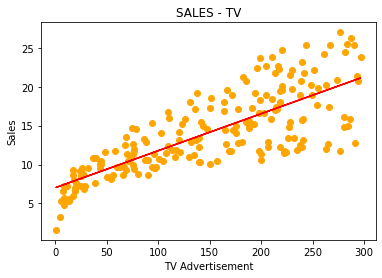

In [25]:
# Şimdi TV Reklam Bütçesi ile Satış değerleri arasındaki ilişkiyi inceleyelim.
# SATIŞ - TV REKLAMI
# TV için tuttuğumuz değişken -> X1 

plt.scatter(X1, y, c="orange")

# Ortalama değeri göstermek için regresyon yapacağız
linearRegressor.fit(X1_regression, y_regression)
y_prediction_1 = linearRegressor.predict(X1_regression)
plt.plot(X1, y_prediction_1, color="red")

plt.xlabel("TV Advertisement")
plt.ylabel("Sales")
plt.title("SALES - TV")
plt.show()

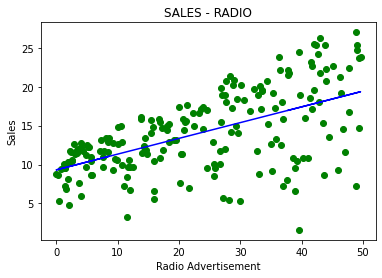

In [26]:
# Şimdi Radyo Reklam Bütçesi ile Satış değerleri arasındaki ilişkiyi inceleyelim.
# SATIŞ - RADYO REKLAMI
# Radyo için tuttuğumuz değişken -> X2

plt.scatter(X2, y, c="green")

# Ortalama değeri göstermek için regresyon yapacağız
linearRegressor.fit(X2_regression, y_regression)
y_prediction_2 = linearRegressor.predict(X2_regression)
plt.plot(X2, y_prediction_2, color="blue")

plt.xlabel("Radio Advertisement")
plt.ylabel("Sales")
plt.title("SALES - RADIO")
plt.show()

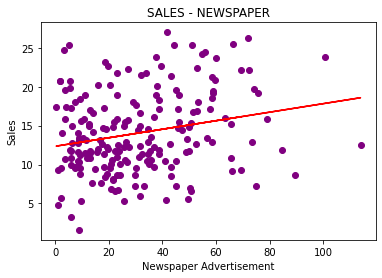

In [27]:
# Şimdi Gazete Reklam Bütçesi ile Satış değerleri arasındaki ilişkiyi inceleyelim.
# SATIŞ - GAZETE REKLAMI
# Gazete için tuttuğumuz değişken -> X3

plt.scatter(X3, y, c="purple")

# Ortalama değeri göstermek için regresyon yapacağız
linearRegressor.fit(X3_regression, y_regression)
y_prediction_3 = linearRegressor.predict(X3_regression)
plt.plot(X3, y_prediction_3, color="red")

plt.xlabel("Newspaper Advertisement")
plt.ylabel("Sales")
plt.title("SALES - NEWSPAPER")
plt.show()

***
**Genel olarak şöyle düşünelim**

`Y (OUTPUT DEĞİŞKENİ)` ile `X (INPUT/PREDICTION DEĞİŞKENİ)` arasında şu şekilde bir ilişki olduğunu kabul edelim:

$$Y = f(X) + \epsilon$$

Burada:

**$f()$** : Ne olduğu bilinmeyen bir fonksiyon. Bu fonksiyon içerisine verdiğimiz tahmin değişkeni ile bir sonuç yaratıp Y'ye atar. Biz bu fonksiyonu bilemeyiz çünkü aldığı veriye göre değişiklik gösterir. $f()$ fonksiyonu için yalnızca tahminlerde bulunabiliriz.

**$\epsilon$** : Rasgele hata miktarı (error term) -> ölçüm hatası, insan hatası vs.

***
**Örnek 2**

Şimdi de Gelir ile Eğitim Düzeyi arasındaki ilişkiye bakalım.

Elimizde 30 çalışana ait Gelir (Income) ve Toplam Eğitim Aldığı Yıl (Education) bilgisi var.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [29]:
incomeDf = pd.read_csv("data/Income.csv", index_col=0)

In [30]:
incomeDf.head()

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


In [31]:
# Input değişkenimizi oluşturalım

X = incomeDf["Education"]

In [32]:
# Output değişkenimizi oluşturalım

y = incomeDf["Income"]

In [33]:
# Lineer regresyon yapabilmek için input ve output değişkenlerimizin shape'lerini hazırlayalım

X_regression = X.values.reshape(-1, 1)
y_regression = y.values.reshape(-1, 1)

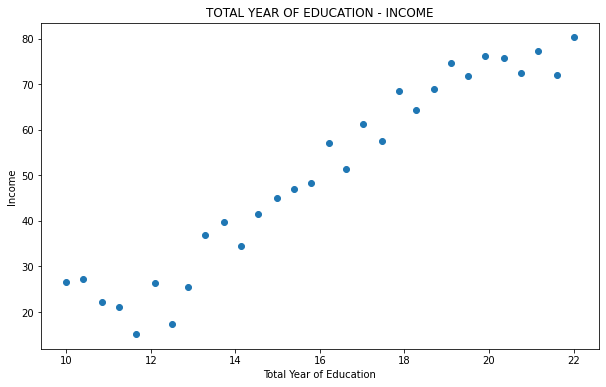

In [34]:
# Input ve Output değişkenimiz arasındaki ilişkiyi gösteren grafiği oluşturalım

plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel("Total Year of Education")
plt.ylabel("Income")
plt.title("TOTAL YEAR OF EDUCATION - INCOME")

plt.show()

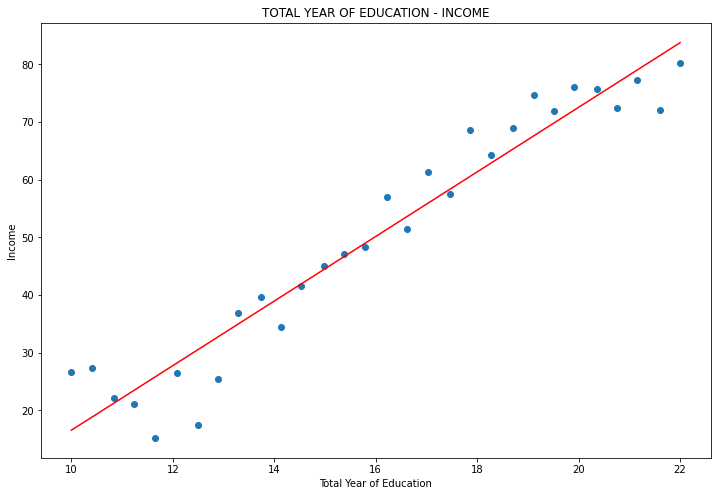

In [35]:
# Input ve Output değişkenimiz arasındaki ilişkiyi gösteren grafiğe regresyon doğrusunu oluşturalım.

plt.figure(figsize=(12, 8))
plt.scatter(X, y)

# Regresyon
linearRg = LinearRegression()
linearRg.fit(X_regression, y_regression)
y_pred = linearRg.predict(X_regression)

# Regresyon doğrusu oluşturma
plt.plot(X, y_pred, color="red")

plt.xlabel("Total Year of Education")
plt.ylabel("Income")
plt.title("TOTAL YEAR OF EDUCATION - INCOME")

plt.show()

Grafiği incelediğimizde, oluşturduğumuz lineer regresyon eğrisinin bazı noktaları kaçırdığını görüyoruz çünkü lineer regresyon sonucunda ortaya doğrusal bir eğri çıkıyor.

Kaçırdığımız noktaları da yakalayabilmek için eğriyi daha yüksek dereceli bir polinom olacak şekilde (4. derece) modelleyebiliriz. Yani Polynomial Regression kullanabiliriz. Bu durumda grafik aşağıdaki gibi olurdu:

<img src='images/quadratik.jpg' />

Bu sefer başka bir fonksiyon görüyoruz ve bu fonksiyon veriye biraz daha güzel oturdu.

Ama hala **f**'i tam olarak bilmiyoruz.

**Aslında, makine öğrenmesi f'ye yaklaşmak için (hiçbir zaman bilemeyiz çünkü) geliştirilmiş algoritmalardır.**

Eğer **f**'yi bilmiyorsak, o zaman tahmin etmeye çalışacağız.

**İşte bu, tahmin yapıp, bilmediğimiz f'ye yaklaşma çabasına `Öğrenme` diyoruz. Yani `Öğrenme`, girdi ile çıktı değişkenleri arasındaki ilişkiyi tahmin edebilme çabasıdır.**
